<a href="https://colab.research.google.com/github/ChrisDaVillager/Data-Science-Salaries/blob/main/Data_Science_Salaries_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: **Christopher Puccetti**

# **Mount & Import**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sklearn.metrics as metrics
from sklearn import set_config
set_config(display='diagram')

# **Dataset: Data Science Job Salaries**

In [3]:
df2 = pd.read_csv('/content/drive/MyDrive/Stack 2/ds_salaries.csv')
df2.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


1. Source of data
  * https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries
2. Brief description of data
  * Salaries of Data Science careers based on exp level, location and title
3. What is the target?
  * Target is 'salary'
4. Is this a classification or regression problem?
  * Regression
5. How many features?
  * 12 total features
6. How many rows of data.
  * 607 rows
7. What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
  * Small dataset & binarizing values

In [4]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


#**Data Cleaning and Visualization**

**To meet the requirements for this week you must have:**

-deleted unnecessary columns

-deleted duplicate rows

-identified and addressed missing values 

-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

-produced univariate visuals for the target and all features

-identified outliers

-clearly commented all of your cleaning steps and described any decisions you made



In [5]:
df2.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


**Dropping unnecessary columns**

In [6]:
# removing unnecessary columns
# removing 'salary', 'salary_currency' and 'Unnamed: 0' & 'company_location' as we will focus on salary in USD
df2 = df2.drop(columns=['Unnamed: 0', 'salary', 'salary_currency', 'company_location'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_size        607 non-null    object
dtypes: int64(3), object(5)
memory usage: 38.1+ KB


**Checking duplicate values**

In [7]:
df2.duplicated().sum()

42

In [8]:
df2.drop_duplicates(keep=False, inplace=True)
df2.duplicated().sum()

0

**Checking missing values**

In [9]:
df2.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_size          0
dtype: int64

**Checking inconsistencies in data for categorical values**
* No inconsistencies found in data

In [10]:
df2['employment_type'].value_counts()

FT    517
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

**Produce univariate visuals for the target and all features**

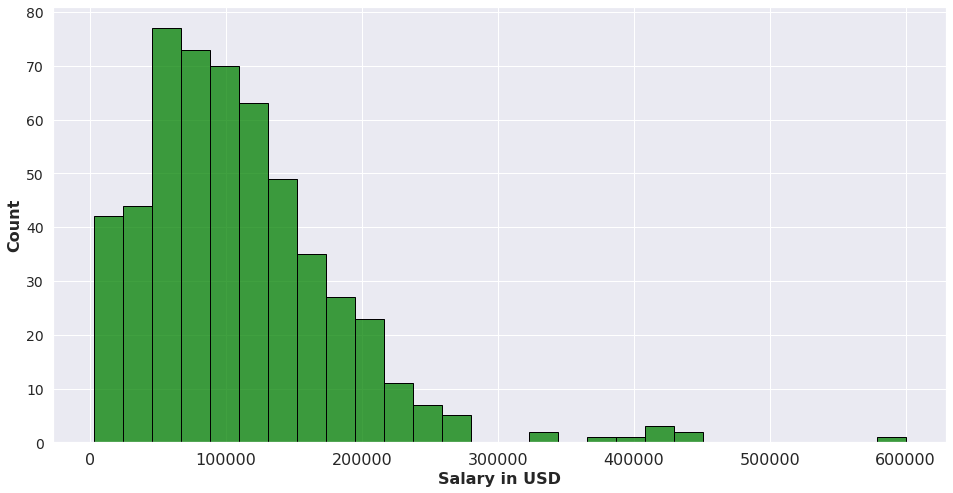

In [11]:
# creating histogram of salaries

sns.set(style = 'darkgrid')
plt.figure(figsize=(16,8))

sns.histplot(data=df2, x='salary_in_usd', color='green', edgecolor='black')
plt.xlabel('Salary in USD', size=16, weight='semibold')
plt.xticks(size=16)
plt.ylabel('Count', size=16, weight='semibold')
plt.yticks(size=14)

plt.show();

The above histogram displays the Salaries of Data Science careers in USD. As displayed, most careers average around 100k. There are a few outliers like 400k & 600k. The higher the salary, the more important that role could be.

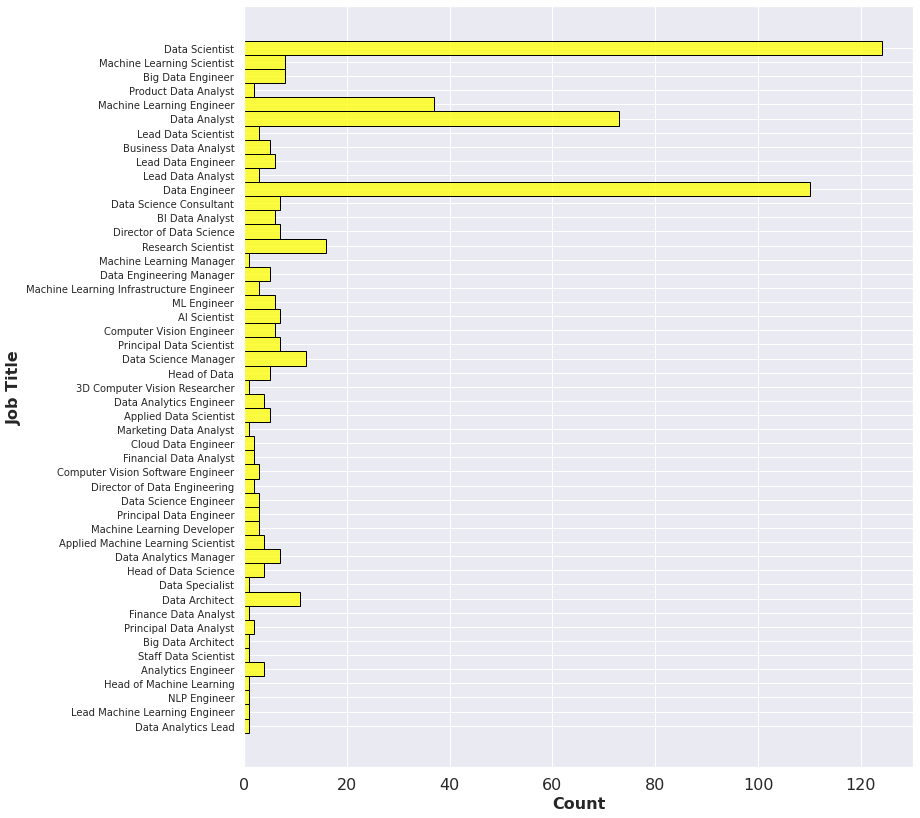

In [12]:
# creating secondary histogram to display job titles 

sns.set(style = 'darkgrid')
plt.figure(figsize=(12,14))

sns.histplot(data=df2, y='job_title', color='yellow', edgecolor='black')
plt.xlabel('Count', size=16, weight='semibold')
plt.xticks(size=16)
plt.ylabel('Job Title', size=16, weight='semibold')
plt.yticks(size=10)

plt.show();

Our histogram above is displaying the amount of roles, alongside the amount of employees that sit in the role, in our dataset. We can see a majority of our employees from our dataset sits in the Data Scientist/Engineer role.

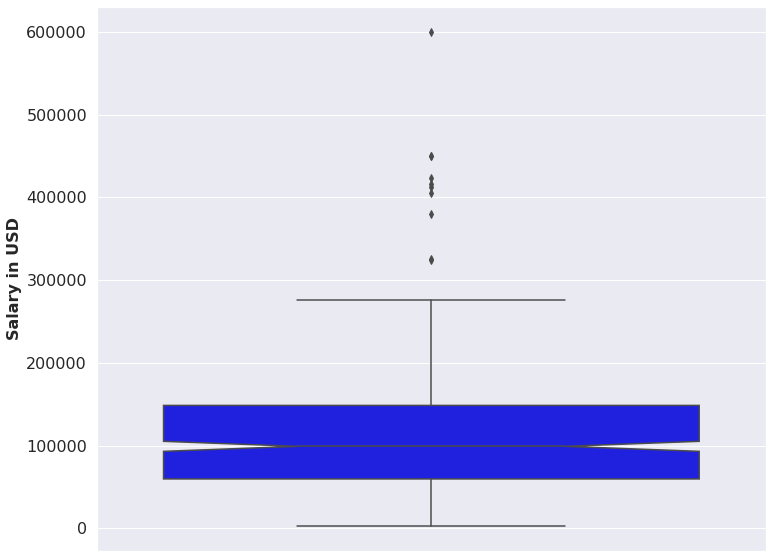

In [13]:
# creating boxplot of salaries

sns.set(style='darkgrid')
plt.figure(figsize = (12,10))

sns.boxplot(data=df2, y='salary_in_usd', notch= True, color='Blue')
plt.ylabel('Salary in USD', size=16, weight='semibold')
plt.yticks(size=16)

plt.show();

The boxplot displays the average salary range for the employees in our dataset. Majority of the provided data is in the range of 80k to 150k. The median salary sits just above 100k. Outliers are easily displayed, in compared to our histogram. 

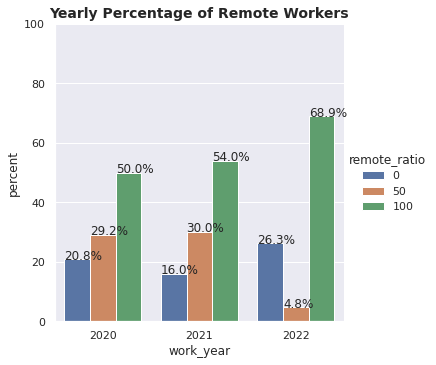

In [14]:
# creating countplot defining x='work_year' and hue='remote_ratio'
# CITING: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
# CITING cont: using percentages on top of barplots

sns.set_theme(style='darkgrid')

x,y = 'work_year','remote_ratio'

df3 = df2.groupby(x)[y].value_counts(normalize=True)
df3 = df3.mul(100)
df3 = df3.rename('percent').reset_index()

z = sns.catplot(x=x, y='percent', hue=y, kind='bar', data=df3)
z.ax.set_ylim(0,100)

for g in z.ax.patches:
    text = str(g.get_height().round(1)) + '%'
    text_x = g.get_x()
    text_y = g.get_height()
    z.ax.text(text_x, text_y, text)

plt.title('Yearly Percentage of Remote Workers', weight='bold', size=14)
plt.show();

The above countplot displays the amount of employees that either worked in office, hybrid or remote throughout 2020 to 2022. We can see that remote work increased from '20 to '21 and a huge jump from '21 to '22. Office work did increase over the 2 years and hybrid decreased. Employee's had to have made a decision of which type of work they would rather do. 

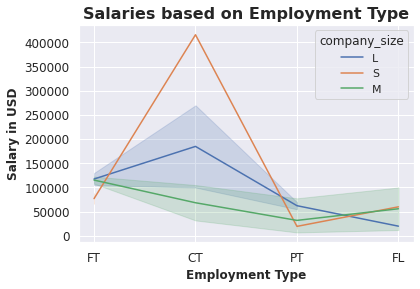

In [15]:
# creating lineplot to display how much employee's make based on their employment type and the size of the company they work for
sns.set_theme(style='darkgrid')
sns.lineplot(data=df2, x='employment_type', y='salary_in_usd', hue='company_size')

plt.title('Salaries based on Employment Type', weight='bold', size=16)
plt.xlabel('Employment Type', weight='semibold')
plt.xticks(size=12)
plt.ylabel('Salary in USD', weight='semibold')
plt.yticks(size=12)

plt.show();

Our lineplot shows the salaries of employee's based on their employment type. Small companies has a very big outlier when it comes to their CT type(contract work). This specific employee must have had a really good contract with a known consumer to land that salary. Both Large and Small companies pay their contract workers more, yet Medium sized companies pay all their non-FullTime employee's less on average. Free lance employee's dont get much of a salary, as do Part Time employees. 

In [16]:
# calulate mean of salaries based on job title using median
# CITING: https://stackoverflow.com/questions/53771596/how-to-find-average-salary-for-each-job-role-from-a-file-in-python
# CITING: https://betterprogramming.pub/visualize-charts-using-groupby-and-aggregate-python-functions-56454820a25c
# using groupby to gather information salary of job titles per year
# pivoting dataframe for better visualization
# dropping all NaN values
job_salary = df2.groupby(['job_title', 'work_year']).agg({'salary_in_usd':'median'})
job_salary = job_salary.pivot_table(index='work_year', columns='job_title', values='salary_in_usd')
job_salary.dropna(axis=1, inplace=True)
job_salary

job_title,AI Scientist,Business Data Analyst,Computer Vision Engineer,Data Analyst,Data Engineer,Data Science Manager,Data Scientist,Director of Data Science,Lead Data Engineer,ML Engineer,Machine Learning Engineer,Machine Learning Infrastructure Engineer,Machine Learning Scientist,Principal Data Scientist,Research Scientist
work_year,,,,,,,,,,,,,,,
2020,45896.0,117500.0,60000.0,46759.0,74130.0,190200.0,62726.0,325000.0,90500.0,15966.0,138000.0,50180.0,260000.0,148261.0,246000.0
2021,15026.5,59102.0,24000.0,75000.0,74666.5,148000.0,61467.0,153667.0,160000.0,166682.0,70132.5,195000.0,172500.0,220000.0,66904.5
2022,160000.0,44677.0,67500.0,106260.0,108800.0,159000.0,130000.0,196979.0,118187.0,21983.0,109079.0,58255.0,153000.0,162674.0,106713.5


In [17]:
job_salary.describe()

job_title,AI Scientist,Business Data Analyst,Computer Vision Engineer,Data Analyst,Data Engineer,Data Science Manager,Data Scientist,Director of Data Science,Lead Data Engineer,ML Engineer,Machine Learning Engineer,Machine Learning Infrastructure Engineer,Machine Learning Scientist,Principal Data Scientist,Research Scientist
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,73640.833333,73759.666667,50500.000000,76006.333333,85865.500000,165733.333333,84731.000000,225215.333333,122895.666667,68210.333333,105737.166667,101145.000000,195166.666667,176978.333333,139872.666667
std,76365.311222,38560.766672,23254.031908,29763.262260,19863.671004,21890.941810,39209.157617,89088.254626,34988.443182,85332.015823,34056.941680,81381.030806,56987.571744,37948.405689,94039.604851
min,15026.500000,44677.000000,24000.000000,46759.000000,74130.000000,148000.000000,61467.000000,153667.000000,90500.000000,15966.000000,70132.500000,50180.000000,153000.000000,148261.000000,66904.500000
25%,30461.250000,51889.500000,42000.000000,60879.500000,74398.250000,153500.000000,62096.500000,175323.000000,104343.500000,18974.500000,89605.750000,54217.500000,162750.000000,155467.500000,86809.000000
50%,45896.000000,59102.000000,60000.000000,75000.000000,74666.500000,159000.000000,62726.000000,196979.000000,118187.000000,21983.000000,109079.000000,58255.000000,172500.000000,162674.000000,106713.500000
75%,102948.000000,88301.000000,63750.000000,90630.000000,91733.250000,174600.000000,96363.000000,260989.500000,139093.500000,94332.500000,123539.500000,126627.500000,216250.000000,191337.000000,176356.750000
max,160000.000000,117500.000000,67500.000000,106260.000000,108800.000000,190200.000000,130000.000000,325000.000000,160000.000000,166682.000000,138000.000000,195000.000000,260000.000000,220000.000000,246000.000000


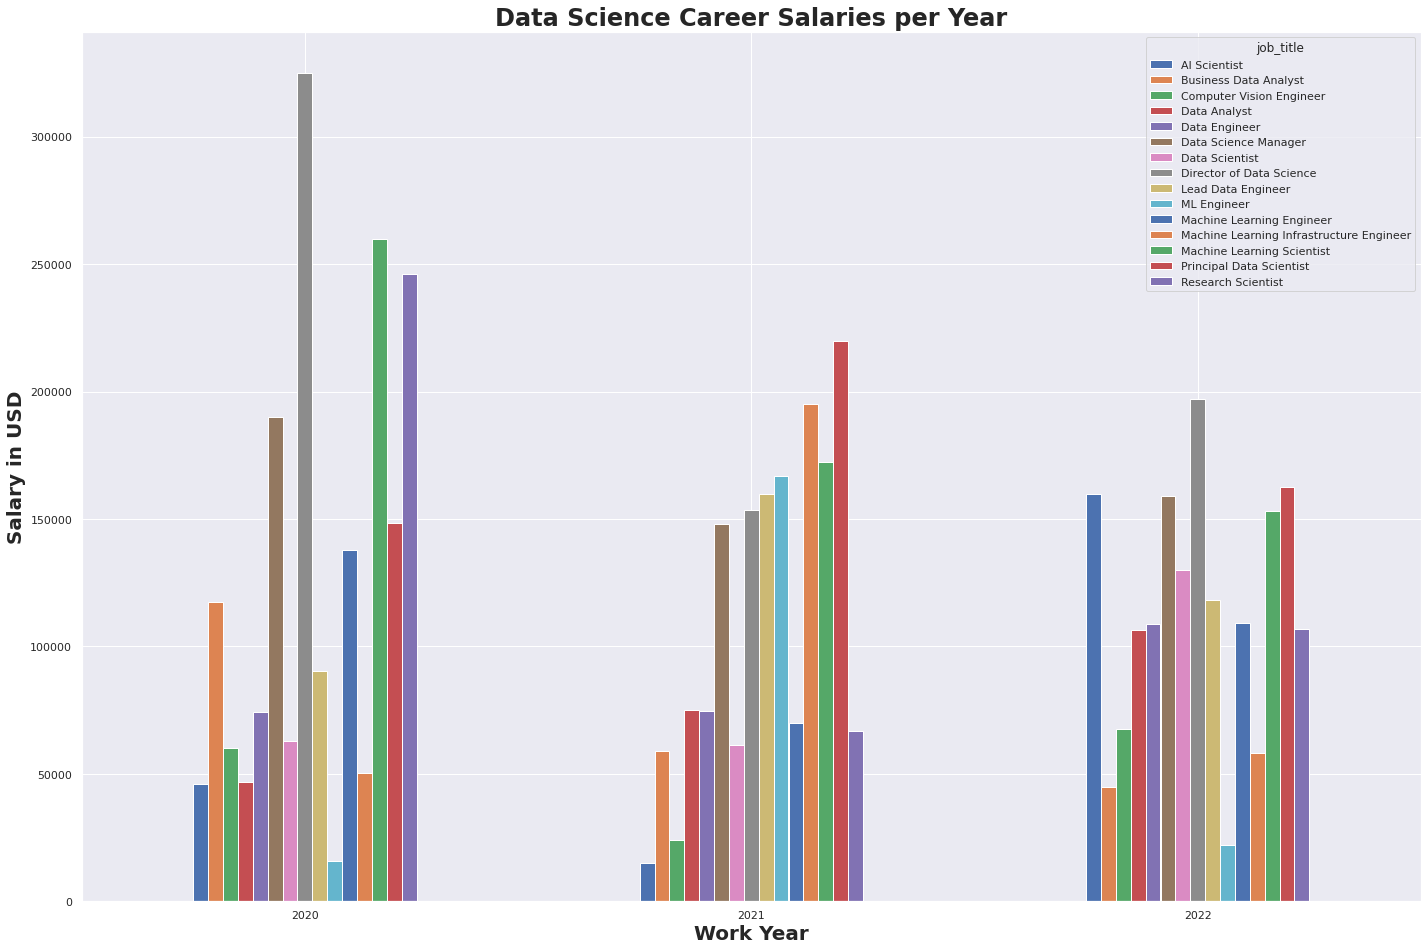

In [18]:
# creating barplot to display salaries based on job title 

sns.set(style = 'darkgrid')
sns.color_palette("Paired")

job_salary.plot.bar(figsize=(24,16))
plt.title('Data Science Career Salaries per Year', weight='bold', size=24)
plt.xlabel('Work Year', weight='semibold', size=20)
plt.xticks(rotation=0)
plt.ylabel('Salary in USD', weight='semibold', size=20)
plt.show();

Displayed above are the salaries of our Data Science careers from 2020 to 2022. We created a brand new dataframe and removed all job titles that had no salary provided. According to our visualization, in 2020 there were a few outliers (Director of Data Science, Machine Learning Scientist and Research Scientist). For those looking to become Data Analysts/Scientists, we can see their salaries have either remained steady or increased over the past few years. Data Analysts have seen a big increase in salary, now sitting around $100k. 

#**Model Development**

**Preprocessing Data**

In [19]:
# create copy of df for ML
df_ml = df2.copy()
df_ml.drop(columns=['job_title'], inplace=True)
df_ml.head()

,work_year,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_size
0,2020,MI,FT,79833,DE,0,L
1,2020,SE,FT,260000,JP,0,S
2,2020,SE,FT,109024,GB,50,M
3,2020,MI,FT,20000,HN,0,S
4,2020,SE,FT,150000,US,50,L


In [20]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 0 to 606
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           536 non-null    int64 
 1   experience_level    536 non-null    object
 2   employment_type     536 non-null    object
 3   salary_in_usd       536 non-null    int64 
 4   employee_residence  536 non-null    object
 5   remote_ratio        536 non-null    int64 
 6   company_size        536 non-null    object
dtypes: int64(3), object(4)
memory usage: 49.7+ KB


In [21]:
df_ml['company_size'].value_counts()

M    267
L    188
S     81
Name: company_size, dtype: int64

In [22]:
# ordinal encoding exp_level, emp_type & comp_size
exp_replace = {'SE':0, 'MI':1, 'EN':2, 'EX':3}
emp_replace = {'FL':0, 'CT':1, 'PT':2, 'FT':3}
comp_replace = {'S':0, 'M':1, 'L':2}

df_ml['experience_level'].replace(exp_replace, inplace=True)
df_ml['employment_type'].replace(emp_replace, inplace=True)
df_ml['company_size'].replace(comp_replace, inplace=True)
df_ml['company_size']

0      2
1      0
2      1
3      0
4      2
      ..
602    1
603    1
604    1
605    1
606    2
Name: company_size, Length: 536, dtype: int64

In [23]:
# defining features & target
X = df_ml.drop('salary_in_usd', axis=1)
y = df_ml['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
# instantiating selectors & transformers 
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [25]:
# instantiate pipelines & transformers
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)

num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d6b15ee10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d6b15ef90>)])

In [26]:
# transform training and testing data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_processed

array([[ 0.95589212,  0.12415255,  0.16394189, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.95589212, -1.03652946,  0.16394189, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.95589212,  1.28483457,  0.16394189, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.47261581, -1.03652946,  0.16394189, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.95589212,  0.12415255,  0.16394189, ...,  0.        ,
         1.        ,  0.        ],
       [-0.47261581,  0.12415255,  0.16394189, ...,  0.        ,
         0.        ,  0.        ]])

**Random Forest Model**

In [57]:
# instantiate RF
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [58]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [59]:
# predict model
prediction = rf.predict(X_test_processed)
prediction

array([ 56768.046912  ,  77424.5       , 102671.64241667,  74571.29036508,
       156748.68      , 135606.04165701, 143505.61309524, 133876.27406926,
        46770.4595    , 138485.21      ,  84801.08916667, 146397.20401956,
       208325.83306971, 245016.00757576, 103285.85033333,  60582.70283333,
       146397.20401956, 117577.9       ,  28281.81166667,  74762.03533333,
        40526.09      ,  74285.49580556,  70109.6       ,  41313.34030952,
        95005.03961508, 105328.54459524, 135606.04165701, 116352.09      ,
       112614.10264735,  50636.386     , 146397.20401956, 118779.35318326,
        56205.15608516, 146397.20401956,  83150.95238095, 172530.44190811,
       162389.92137446,  47111.08333333,  24993.18333333,  49545.66916667,
        67091.49      , 137519.67380952,  80255.14      ,  74896.01370851,
        67643.57291667, 146397.20401956,  67438.79333333,  63455.47763889,
        61497.32595238, 116823.23333333,  54551.33233333,  21054.42      ,
       146397.20401956,  

In [73]:
# evaluate model
# high train score, low test score
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(f'Training Score: {rf_train_score}')
print(f'Testing Score: {rf_test_score}')
print('MAE: ', mean_absolute_error(y_test, prediction))
print('MSE: ', mean_squared_error(y_test, prediction))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, prediction)))

Training Score: 0.6826704429677215
Testing Score: 0.41196865738654387
MAE:  39406.77155371119
MSE:  4361255817.558198
RMSE:  66039.80479648769


In [74]:
# set max_depth to 6 for another evaluation
rf_6 = RandomForestRegressor(max_depth=6, random_state=42)
rf_6.fit(X_train_processed, y_train)
y_pred = rf_6.predict(X_test_processed)
rf_6_train_score = rf_6.score(X_train_processed, y_train)
rf_6_test_score = rf_6.score(X_test_processed, y_test)
print(f'Training Score: {rf_6_train_score}')
print(f'Testing Score: {rf_6_test_score}')
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Training Score: 0.6169561597823114
Testing Score: 0.4135129731588937
MAE:  39529.732878063165
MSE:  4349802080.897881
RMSE:  65953.0293534564


**Tuning using GridSearchCV**

In [32]:
# instantiating model and setting grid parameters
model = make_pipeline(StandardScaler(),RandomForestRegressor())
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestregressor', RandomForestRegressor())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestregressor': RandomForestRegressor(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_score': False,
 'randomfore

In [86]:
param_grid = {'randomforestregressor__max_depth': [5, 10, 15],
              'randomforestregressor__min_samples_leaf': [1, 10, 20],
              'randomforestregressor__min_samples_split': [10, 50, 100],
              'randomforestregressor__n_estimators': [250, 300, 350]}

In [87]:
# fit grid search onto training data
rf_grid_search = GridSearchCV(model, param_grid)
rf_grid_search.fit(X_train_processed, y_train)
rf_grid_search.best_params_

{'randomforestregressor__max_depth': 10,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 50,
 'randomforestregressor__n_estimators': 300}

In [89]:
# evaluate best model by grabbing best R2 score
best_rf_model = rf_grid_search.best_estimator_
best_rf_model.fit(X_train_processed, y_train)
y_pred2 = best_rf_model.predict(X_test_processed)
best_rf_train_score = best_rf_model.score(X_train_processed, y_train)
best_rf_test_score = best_rf_model.score(X_test_processed, y_test)
print(f'Training Score: {best_rf_train_score}')
print(f'Testing Score: {best_rf_test_score}')
print('MAE: ', mean_absolute_error(y_test, y_pred2))
print('MSE: ', mean_squared_error(y_test, y_pred2))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred2)))

Training Score: 0.5494756485092451
Testing Score: 0.3877668509837334
MAE:  40470.8205725769
MSE:  4540753509.808011
RMSE:  67385.11341392853


**K-Nearest Neighbors Model with & without PCA**

In [56]:
# creating evaluation model function for MAE, RMSE & R2 Score
def eval_model(y_true, y_pred):
  
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'scores: \nMAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.2f}')

In [37]:
# instantiate scaler & pca > pipeline
# will use 90% variance
# transform data to check features after PCA app.
pca = PCA(n_components=.90)
preprocessor_pca = make_pipeline(scaler, pca)

print('Shape prior PCA:', X_train_processed.shape)
print('Shape after PCA:', preprocessor_pca.fit_transform(X_train_processed).shape)
print('Columns Reduced by:', X_train_processed.shape[1] - preprocessor_pca.fit_transform(X_train_processed).shape[1])

Shape prior PCA: (402, 57)
Shape after PCA: (402, 49)
Columns Reduced by: 8


In [38]:
# instantiate KNN
knn = KNeighborsRegressor()

**With PCA**

* We'll plot first 50 components in order to clearly see diminishing returns
* Diminishing returns tend to occur around 7 components

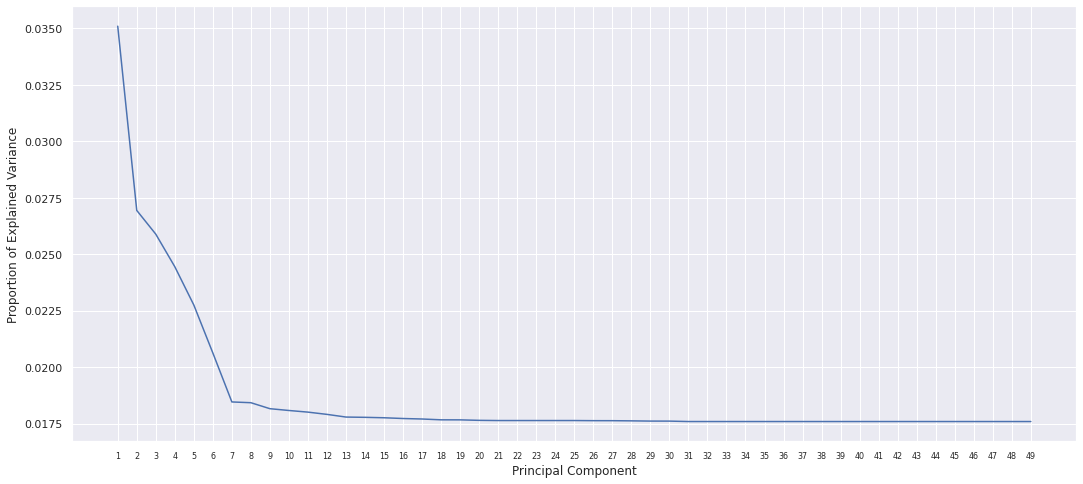

In [39]:
# Plot the explained variance ratios of the first 50 principal components
plt.figure(figsize=(18,8))
plt.plot(range(1, 50), pca.explained_variance_ratio_)
plt.xticks(ticks = range(1, 50), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance');

In [40]:
%%time
# using PCA 
pca90 = PCA(n_components=.9)
knn_pca = make_pipeline(preprocessor, pca90, knn)
knn_pca.fit(X_train, y_train)

print('Training Data')
eval_model(y_train, knn_pca.predict(X_train))
print('\nTesting Data')
eval_model(y_test, knn_pca.predict(X_test))

Training Data
scores: 
MAE: 33,721.23 
MSE: 2,498,921,178.04 
RMSE: 49,989.21 
R2: 0.46

Testing Data
scores: 
MAE: 50,397.49 
MSE: 6,253,308,375.77 
RMSE: 79,077.86 
R2: 0.16
CPU times: user 58.1 ms, sys: 32.1 ms, total: 90.2 ms
Wall time: 58.2 ms


**Without PCA**

In [41]:
%%time
# no PCA
no_pca = make_pipeline(scaler, knn)
no_pca.fit(X_train_processed, y_train)

print('Training Data')
eval_model(y_train, no_pca.predict(X_train_processed))
print('\nTesting Data')
eval_model(y_test, no_pca.predict(X_test_processed))

Training Data
scores: 
MAE: 37,413.21 
MSE: 2,838,094,762.92 
RMSE: 53,273.77 
R2: 0.39

Testing Data
scores: 
MAE: 49,808.41 
MSE: 6,008,096,662.89 
RMSE: 77,511.91 
R2: 0.19
CPU times: user 21.8 ms, sys: 11 ms, total: 32.9 ms
Wall time: 23.4 ms


**Tuning using GridSearchCV**

In [42]:
# instantiate model pipeline
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor())
knn_pipeline.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsregressor', KNeighborsRegressor())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsregressor': KNeighborsRegressor(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsregressor__algorithm': 'auto',
 'kneighborsregressor__leaf_size': 30,
 'kneighborsregressor__metric': 'minkowski',
 'kneighborsregressor__metric_params': None,
 'kneighborsregressor__n_jobs': None,
 'kneighborsregressor__n_neighbors': 5,
 'kneighborsregressor__p': 2,
 'kneighborsregressor__weights': 'uniform'}

In [77]:
# set grid parameters, instantiate pipelines & evaluate best model
knn_grid = {'kneighborsregressor__n_neighbors': range(1,10),
            'kneighborsregressor__p': range(1,5),
            'kneighborsregressor__weights': ['distance','uniform']}

knn_pipeline_gs = GridSearchCV(knn_pipeline, knn_grid)
knn_pipeline_gs.fit(X_train_processed, y_train)
print(knn_pipeline_gs.best_params_)

best_knn_model = knn_pipeline_gs.best_estimator_
best_knn_model.fit(X_train_processed, y_train)
y_pred3 = best_knn_model.predict(X_test_processed)
best_knn_train_score = best_knn_model.score(X_train_processed, y_train)
best_knn_test_score = best_knn_model.score(X_test_processed, y_test)
print(f'Training Score: {best_knn_train_score}')
print(f'Testing Score: {best_knn_test_score}')
print('MAE: ', mean_absolute_error(y_test, y_pred3))
print('MSE: ', mean_squared_error(y_test, y_pred3))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred3)))

{'kneighborsregressor__n_neighbors': 7, 'kneighborsregressor__p': 3, 'kneighborsregressor__weights': 'uniform'}
Training Score: 0.36048546760820177
Testing Score: 0.14461047756942902
MAE:  50673.73454157783
MSE:  6344172938.807035
RMSE:  79650.31662716123


**FINAL MODEL:**
* 'Best' model would be Random Forest Regression with max_depth of 6. Model predictions would be off by $65k

In [90]:
# set max_depth to 6 for another evaluation
rf_6 = RandomForestRegressor(max_depth=6, random_state=42)
rf_6.fit(X_train_processed, y_train)
y_pred = rf_6.predict(X_test_processed)
rf_6_train_score = rf_6.score(X_train_processed, y_train)
rf_6_test_score = rf_6.score(X_test_processed, y_test)
print(f'Training Score: {rf_6_train_score}')
print(f'Testing Score: {rf_6_test_score}')
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Training Score: 0.6169561597823114
Testing Score: 0.4135129731588937
MAE:  39529.732878063165
MSE:  4349802080.897881
RMSE:  65953.0293534564
